# Гипотеза и метрика

С введением нового алгоритма клиенты станут покупать больше продуктов, и выручка увеличится.

В качестве метрики можно рассмотреть:

- Средняя выручка с пользователя. Эта метрика подойдет, потому что в эксперименте группы примерно одинаковые по количеству людей, и увеличение метрики приведет к росту общей выручки.

- Средняя выручка с платящего пользователя. Количество платящих пользователей может измениться, и выручка не обязательно увеличится.

- Средняя стоимость заказа. Эта метрика не подходит, потому что количество заказов может измениться, и выручка может как уменьшиться, так и увеличиться.

- Количество продуктов в корзине. Эта метрика не подходит, потому что стоимость заказа может измениться, и выручка может как уменьшиться, так и увеличиться.

- Количество заказов. Эта метрика не подходит, потому что стоимость заказа может измениться, и выручка может как уменьшиться, так и увеличиться.

# Предобработка данных

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
from scipy.stats import ttest_ind

In [58]:
user = pd.read_csv('user.csv')
user

,user_id,gender,age,region
0,1,Ж,23,Краснодарский край
1,2,Ж,43,Краснодарский край
2,3,М,36,Краснодарский край
3,4,Ж,39,Краснодарский край
4,5,М,43,Иркутская область
...,...,...,...,...
14995,14996,М,41,Нижегородская область
14996,14997,Ж,30,Астраханская область
14997,14998,М,26,Краснодарский край
14998,14999,М,36,Оренбургская область


In [59]:
user_ab_group = pd.read_csv('user_ab_group.csv')
user_ab_group

,user_id,group
0,5034,treatment
1,4725,treatment
2,911,treatment
3,13267,control
4,5636,control
...,...,...
11910,7599,control
11911,11476,treatment
11912,805,treatment
11913,1743,treatment


In [60]:
good = pd.read_csv('good.csv')
good

,id,good_name,price_per_unit
0,1,Органический авокадо,336
1,2,Льняные семена,796
2,3,Кокосовое масло Extra Virgin,558
3,4,Гречка цельнозерновая,484
4,5,Лосось дикого копчения,480
...,...,...,...
95,96,Органическая кокосовая мука,616
96,97,Семена чиа в меде,379
97,98,Кардамон органический,459
98,99,Куркума в порошке,647


In [61]:
user_purchase = pd.read_csv('user_purchase.csv')
user_purchase

,id,user_id,date_time
0,1,5784,2023-09-20 00:01:07
1,2,4468,2023-09-20 00:04:18
2,3,3827,2023-09-20 00:04:35
3,4,3272,2023-09-20 00:06:32
4,5,9461,2023-09-20 00:08:24
...,...,...,...
74946,74947,5634,2023-11-28 23:52:18
74947,74948,5318,2023-11-28 23:54:22
74948,74949,14345,2023-11-28 23:55:03
74949,74950,795,2023-11-28 23:57:06


In [62]:
purchase_good = pd.read_csv('purchase_good.csv')
purchase_good

,purchase_id,good_id,amount,was_in_recommended_goods
0,15495,34,2,False
1,42640,48,1,False
2,42640,36,1,False
3,42640,12,2,True
4,42640,35,1,True
...,...,...,...,...
352052,53057,54,1,False
352053,72053,37,1,False
352054,72053,7,1,False
352055,72053,24,1,True


In [63]:
df = pd.merge(pd.merge(pd.merge(pd.merge(user, user_ab_group, on = 'user_id', how = 'inner'), user_purchase, on = 'user_id', how = 'inner'), \
         purchase_good, left_on = 'id', right_on = 'purchase_id', how = 'inner'), good, left_on = 'good_id', right_on = 'id', how = 'inner')

In [64]:
df.head()

,user_id,gender,age,region,group,id_x,date_time,purchase_id,good_id,amount,was_in_recommended_goods,id_y,good_name,price_per_unit
0,1,Ж,23,Краснодарский край,control,15495,2023-10-04 10:11:52,15495,34,2,False,34,Кишмиш-жмых,464
1,1,Ж,23,Краснодарский край,control,42640,2023-10-29 20:22:25,42640,48,1,False,48,Спаржа свежая,584
2,1,Ж,23,Краснодарский край,control,42640,2023-10-29 20:22:25,42640,36,1,False,36,Льняные хлопья,404
3,1,Ж,23,Краснодарский край,control,42640,2023-10-29 20:22:25,42640,12,2,True,12,Льняное масло холодного отжима,495
4,1,Ж,23,Краснодарский край,control,42640,2023-10-29 20:22:25,42640,35,1,True,35,Семена чиа в желе,618


Итак, в этой таблице вся информация о покупках. Столбцы id_x, id_y не несут новой информации, так как имеются уже столбцы purchase_id и good_id, поэтому их можно удалить.

In [65]:
df.drop(['id_x', 'id_y'], axis = 1, inplace = True)

## Преобразование характеристик

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284372 entries, 0 to 284371
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   user_id                   284372 non-null  int64 
 1   gender                    284372 non-null  object
 2   age                       284372 non-null  int64 
 3   region                    284372 non-null  object
 4   group                     284372 non-null  object
 5   date_time                 284372 non-null  object
 6   purchase_id               284372 non-null  int64 
 7   good_id                   284372 non-null  int64 
 8   amount                    284372 non-null  int64 
 9   was_in_recommended_goods  284372 non-null  bool  
 10  good_name                 284372 non-null  object
 11  price_per_unit            284372 non-null  int64 
dtypes: bool(1), int64(6), object(5)
memory usage: 24.1+ MB


In [67]:
df['gender'] = df['gender'].astype('category')
df['region'] = df['region'].astype('category')
df['group'] = df['group'].astype('category')
df['group'] = df['group'].astype('category')
df['good_name'] = df['good_name'].astype('category')
df['date_time'] = pd.to_datetime(df['date_time'], format = '%Y-%m-%d %H:%M:%S')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284372 entries, 0 to 284371
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   user_id                   284372 non-null  int64         
 1   gender                    284372 non-null  category      
 2   age                       284372 non-null  int64         
 3   region                    284372 non-null  category      
 4   group                     284372 non-null  category      
 5   date_time                 284372 non-null  datetime64[ns]
 6   purchase_id               284372 non-null  int64         
 7   good_id                   284372 non-null  int64         
 8   amount                    284372 non-null  int64         
 9   was_in_recommended_goods  284372 non-null  bool          
 10  good_name                 284372 non-null  category      
 11  price_per_unit            284372 non-null  int64         
dtypes:

In [69]:
df['cost'] = df['amount'] * df['price_per_unit']

## Знакомство с данными

In [70]:
df.describe()

,user_id,age,date_time,purchase_id,good_id,amount,price_per_unit,cost
count,284372.000000,284372.000000,284372,284372.000000,284372.000000,284372.000000,284372.000000,284372.000000
mean,7456.357388,34.441988,2023-10-23 20:11:52.854613504,36253.423055,51.029845,1.182156,504.041076,595.911535
min,1.000000,14.000000,2023-09-20 00:04:18,2.000000,1.000000,1.000000,299.000000,299.000000
25%,3732.000000,31.000000,2023-10-06 17:30:01,17824.000000,27.000000,1.000000,432.000000,450.000000
50%,7473.000000,34.000000,2023-10-22 11:39:34,34769.500000,51.000000,1.000000,495.000000,535.000000
75%,11155.000000,38.000000,2023-11-10 05:39:27,54879.000000,75.000000,1.000000,574.000000,630.000000
max,15000.000000,58.000000,2023-11-28 23:57:06,74950.000000,100.000000,5.000000,796.000000,3390.000000
std,4310.197437,4.960442,NaN,21438.609772,28.701573,0.446301,99.723310,258.017257


<Axes: xlabel='age', ylabel='Count'>

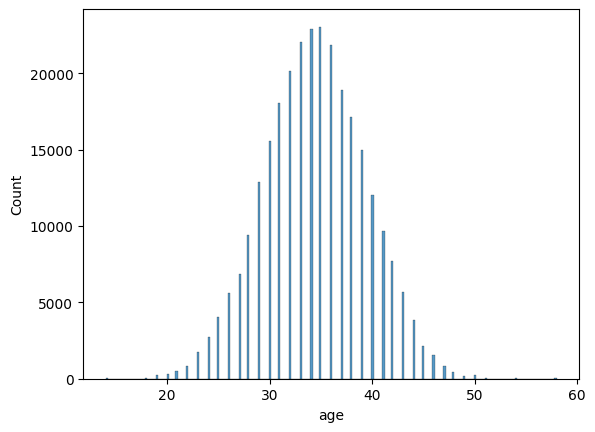

In [71]:
sns.histplot(df['age'])

<Axes: xlabel='price_per_unit'>

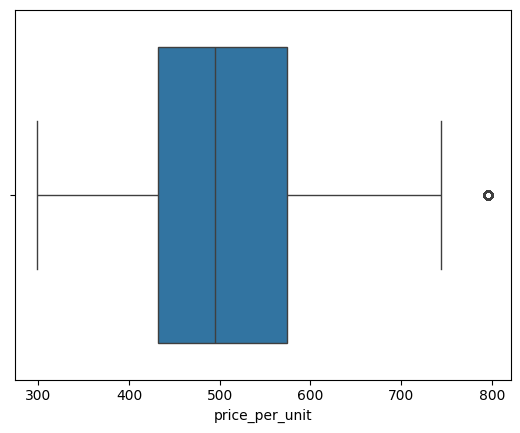

In [72]:
sns.boxplot(x = df['price_per_unit'])

In [73]:
df['region'].value_counts()

region
Краснодарский край       87994
Санкт-Петербург          66127
Иркутская область        42426
Нижегородская область    37979
Оренбургская область     29806
Астраханская область     14297
Республика Адыгея         5743
Name: count, dtype: int64

In [74]:
df.groupby('good_name')['amount'].sum().sort_values(ascending = False)

C:\Users\Ivan Chalov\AppData\Local\Temp\ipykernel_828\4104576918.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('good_name')['amount'].sum().sort_values(ascending = False)


good_name
Авокадо-масло                      6028
Кедровые чипсы                     5633
Морская капуста сушёная            5438
Лосось вяленый                     5400
Амарантовые хлопья                 5321
                                   ... 
Шоколадные коктейльные протеины    1078
Чёрная рисовая мука                 878
Органическая кокосовая мука         561
Масло авокадо                       534
Горький миндальный шоколад          450
Name: amount, Length: 100, dtype: int64

Интересно, что авокадо-масло и масло авокадо - это разные товары.

<Axes: xlabel='cost', ylabel='Count'>

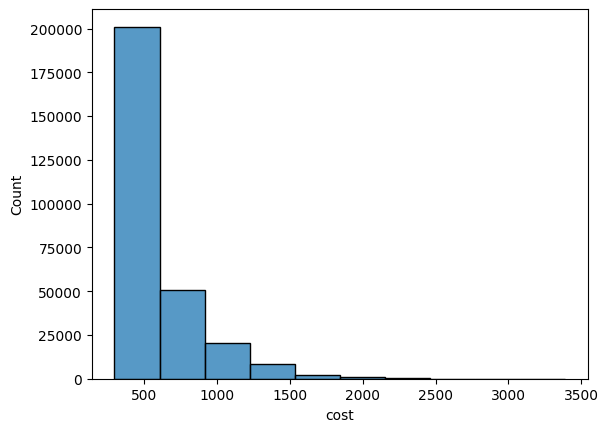

In [75]:
sns.histplot(df['cost'], bins = 10)

<Axes: xlabel='date_with_out_time', ylabel='number_of_purchases'>

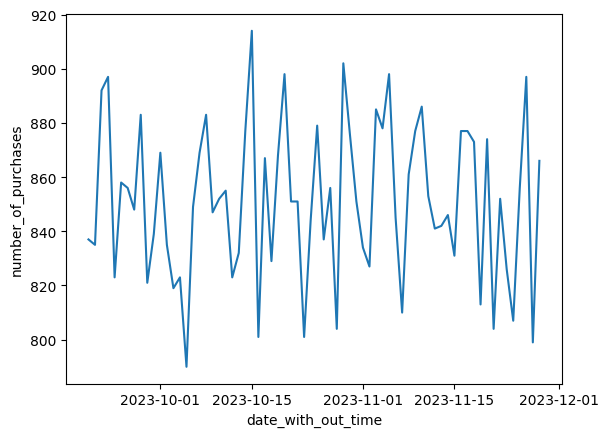

In [76]:
df['date_with_out_time'] = df['date_time'].dt.date
aux = df.groupby('date_with_out_time', as_index = False)['purchase_id'].nunique().rename(columns={'purchase_id': 'number_of_purchases'})
sns.lineplot(x = 'date_with_out_time', y = 'number_of_purchases', data = aux)

Видно, что график числа заказов особо не менялся

# Проверка разбиения на группы

## Проверка на одновременность

In [92]:
(set(df[df['group'] == 'control']['user_id'])) & (set(df[df['group'] == 'treatment']['user_id']))

set()

Получается, что нет user_id человека, который включен одновременно в обе группы.

## SRM

In [78]:
df.groupby('group', as_index = False)['user_id'].nunique()

C:\Users\Ivan Chalov\AppData\Local\Temp\ipykernel_828\4163480480.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('group', as_index = False)['user_id'].nunique()


,group,user_id
0,control,5920
1,treatment,5987


Отличие не существенное, поэтому SRM не возникает

# Анализ результатов эксперимента

Так как эксперимент проводился с 1 октября по 14 октября, и нас интересует анализ результата эксперимента, то оставим данные только за этот период.

In [79]:
data = df[(df['date_time'].dt.month == 10) & (df['date_time'].dt.day >= 1) & (df['date_time'].dt.day <= 14)]
data.head()

,user_id,gender,age,region,group,date_time,purchase_id,good_id,amount,was_in_recommended_goods,good_name,price_per_unit,cost,date_with_out_time
0,1,Ж,23,Краснодарский край,control,2023-10-04 10:11:52,15495,34,2,False,Кишмиш-жмых,464,928,2023-10-04
11,2,Ж,43,Краснодарский край,treatment,2023-10-08 19:23:44,20107,6,1,True,Греческий йогурт с низким содержанием жира,426,426,2023-10-08
12,2,Ж,43,Краснодарский край,treatment,2023-10-08 19:23:44,20107,17,1,False,Бобовые чипсы,539,539,2023-10-08
13,2,Ж,43,Краснодарский край,treatment,2023-10-08 19:23:44,20107,36,1,True,Льняные хлопья,404,404,2023-10-08
14,2,Ж,43,Краснодарский край,treatment,2023-10-08 19:23:44,20107,10,2,True,Мед манука,497,994,2023-10-08


In [80]:
aux = data.groupby(['user_id', 'group'], as_index = False)['cost'].sum()
summary = aux[aux['cost'] != 0]
control = summary.loc[summary['group'] == 'control', 'cost']
treat = summary.loc[summary['group'] == 'treatment', 'cost']

C:\Users\Ivan Chalov\AppData\Local\Temp\ipykernel_828\2831292260.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aux = data.groupby(['user_id', 'group'], as_index = False)['cost'].sum()


Возможно, что есть пользователи, которые не сделали ни одной покупки в период эксперимента. Поэтому они были не учтены и нужно добавить 0 в control и treat

In [81]:
user_ab_group[user_ab_group['group'] == 'control'].shape[0]

5925

In [82]:
control.shape[0]

4269

In [83]:
control = list(control) + [0] * (user_ab_group[user_ab_group['group'] == 'control'].shape[0] - control.shape[0])

In [84]:
user_ab_group[user_ab_group['group'] == 'treatment'].shape[0]

5990

In [85]:
treat.shape[0]

4309

In [86]:
treat = list(treat) + [0] * (user_ab_group[user_ab_group['group'] == 'treatment'].shape[0] - treat.shape[0])

<Axes: ylabel='Count'>

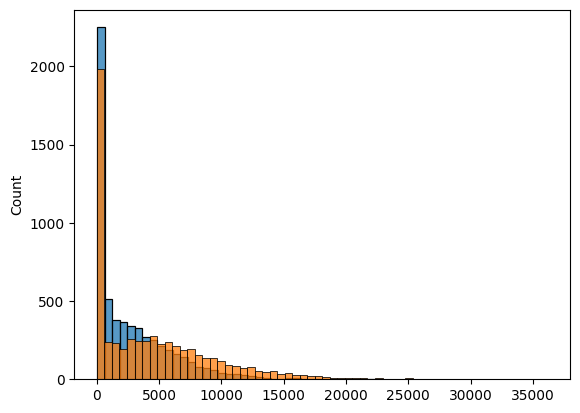

In [87]:
sns.histplot(control, binwidth = 600)
sns.histplot(treat, binwidth = 600)

In [88]:
levene(control, treat)

LeveneResult(statistic=773.1844635858525, pvalue=6.30352090593839e-165)

Так как pvalue < 0.01, то отклоняем нулевую гипотезу. По результатам теста дисперсии в генеральных совокупностях отличаются.

In [89]:
ttest_ind(control, treat, equal_var = False) #equal_var отвечает за равество дисперсий в генеральных совокупностях

TtestResult(statistic=-24.233967540582896, pvalue=3.363478798853414e-126, df=10232.906892414547)

Так как pvalue < 0.01, то отклоняем нулевую гипотезу. По результатам теста средние генеральных совокупностей различаются. Так как значение статистики отрицательно, то среднее значение больше в экспериментальной группе.

Итак, с новым алгоритмом клиент в среднем тратит больше, и выручка магазина увеличится. 

# Интерпретация результатов эксперимента

За счет чего получилось увеличить выручку? 

- клиенты стали больше добавлять товаров в корзину

- увеличилось число заказов

Как уже было показано выше (этап знакомства с данными) число заказов существенно не менялось в период эксперимента. Скорее всего клиенты стали больше добавлять товаров в корзину, и возможно это были рекомендованные товары.

<Axes: xlabel='date_time', ylabel='Count'>

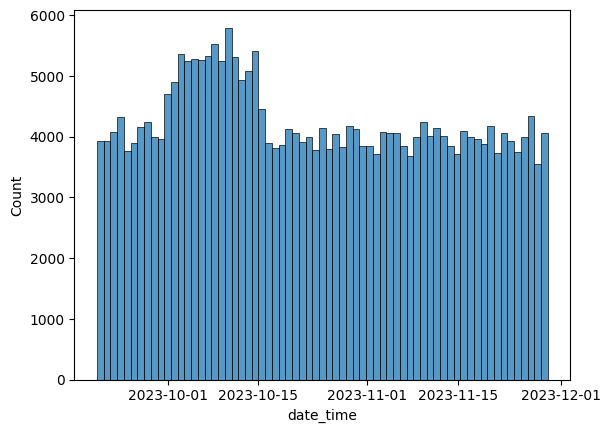

In [90]:
sns.histplot(df['date_time'])

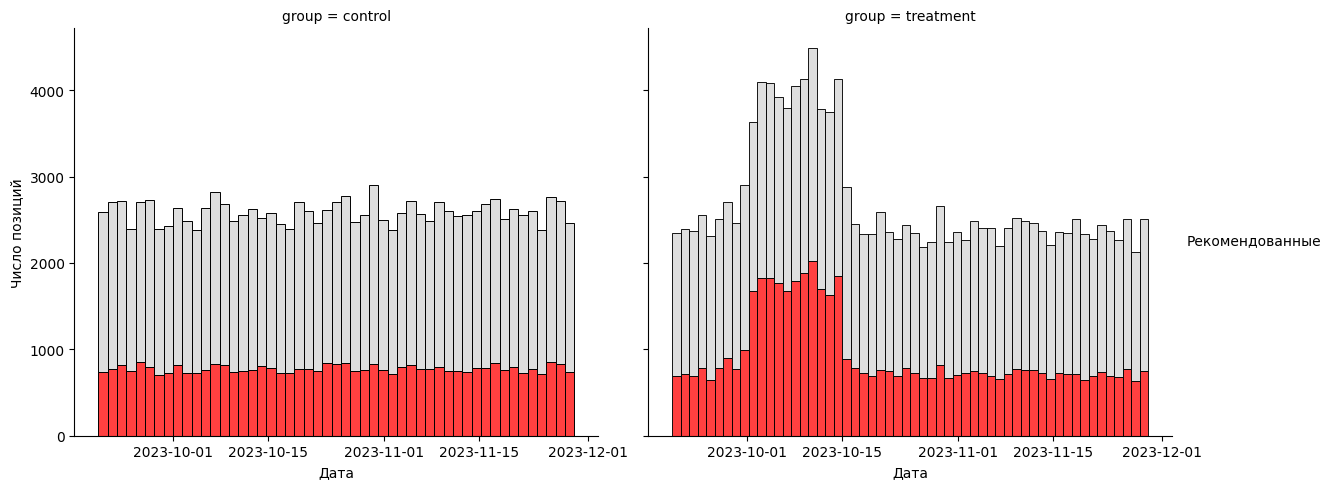

In [91]:
# Создаем фасетную сетку
g = sns.FacetGrid(df, col='group', height=5, aspect=1.2)  
g.map_dataframe(sns.histplot, 
               x='date_time', 
               hue='was_in_recommended_goods',
               multiple='stack',
               palette={True: 'red', False: 'lightgray'})

g.set_axis_labels('Дата', 'Число позиций')
g.add_legend(title='Рекомендованные')
plt.show()

Как видим в период эксперимента оказалось больше рекомендованных товаров, чем обычно.